In [1]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [3]:
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### Spy NAN values
White is NAN, black is finite value

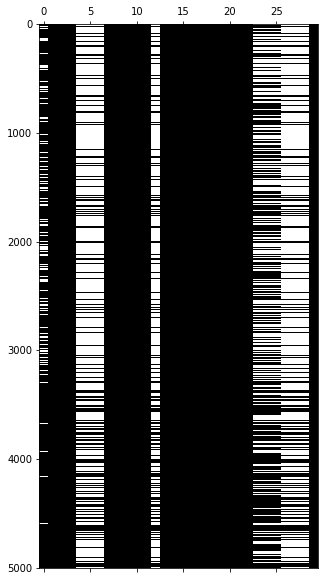

In [39]:
NAN_values_overview_matrix(tx, y)

-> we can observe some (3 at all) different patterns of NAN values -> essayer de déterminer si ces values ont une corrélation avec le label:
- pattern 1: feature 0: 16.8% NAN
- pattern 2: features 4,5,6,12,26,27,28: 70.5 % NAN
- pattern 3: features 23,24,25: 39.7% NAN

In [74]:
#pattern 1 - feature 0
features = [0]
NAN_and_bosons(tx, y, features)

#pattern 2
features = [4,5,6,12,26,27,28]
NAN_and_bosons(tx, y, features)

#pattern 3
features = [23,24,25]
NAN_and_bosons(tx, y, features)

features 0 has 840 nan values with 69 bosons (out of 1643 total bosons) and 771 others
features 4 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 5 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 6 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 12 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 26 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 27 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 28 has 3525 nan values with 969 bosons (out of 1643 total bosons) and 2556 others
features 23 has 1985 nan values with 441 bosons (out of 1643 total bosons) and 1544 others
features 24 has 1985 nan values with 441 bosons (out of 1643 total bosons) and 1544 others
features 25 has 1985 nan values with 441 bosons (out of 1643 total bosons) and 1544 others


### Feature Normalization

In [4]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)
#tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)

In [5]:
#met les nan a 0
tx_zero = transform_nan_to_zero(tx_nan)
tx_nan_mean, mean =transform_to_mean(tx_zero)

###  Divide selon feature 22

In [6]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = separate_PRI_jet_num(tx_nan_mean, y)
print("tx0 has shape {tx0} and y0 has shape {y0}".format(tx0=tx0.shape, y0=y0.shape))
print("tx1 has shape {tx1} and y1 has shape {y1}".format(tx1=tx1.shape, y1=y1.shape))
print("tx2 has shape {tx2} and y2 has shape {y2}".format(tx2=tx2.shape, y2=y2.shape))
print("tx3 has shape {tx3} and y3 has shape {y3}".format(tx3=tx3.shape, y3=y3.shape))

tx0 has shape (1985, 30) and y0 has shape (1985,)
tx1 has shape (1540, 30) and y1 has shape (1540,)
tx2 has shape (1043, 30) and y2 has shape (1043,)
tx3 has shape (432, 30) and y3 has shape (432,)


### Feature Distribution

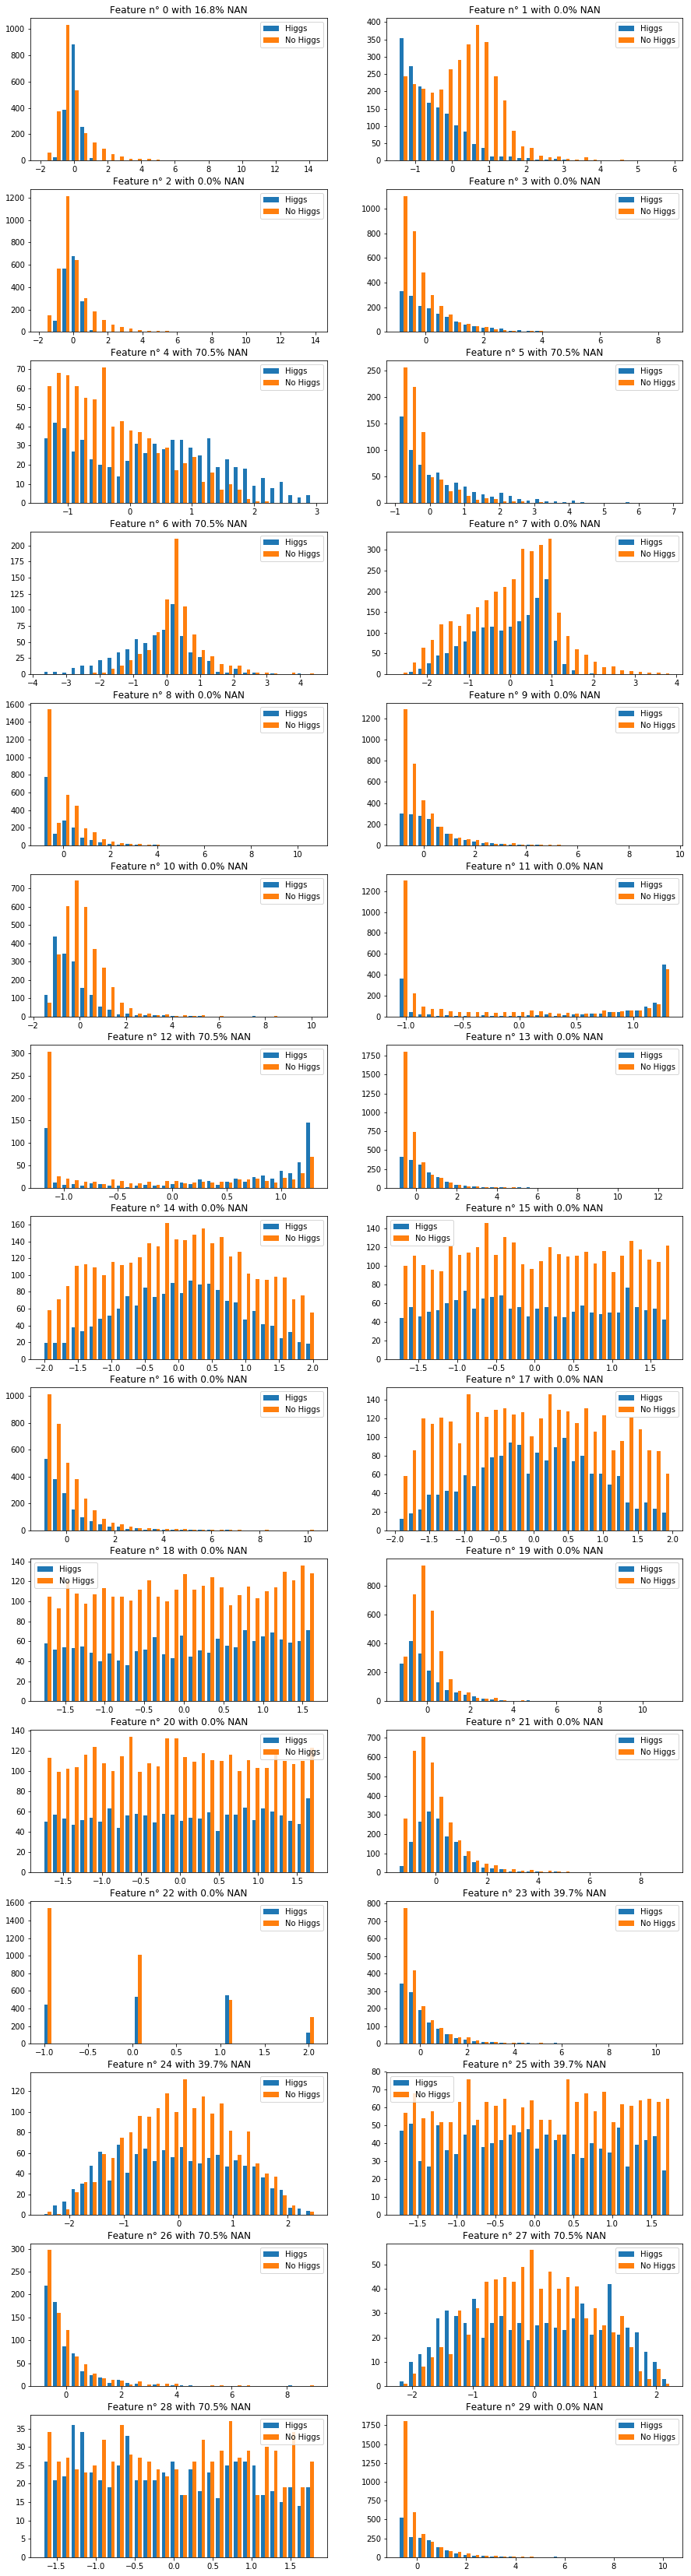

In [71]:
display_feature_distribution(y, tx_nan_norm, 30)


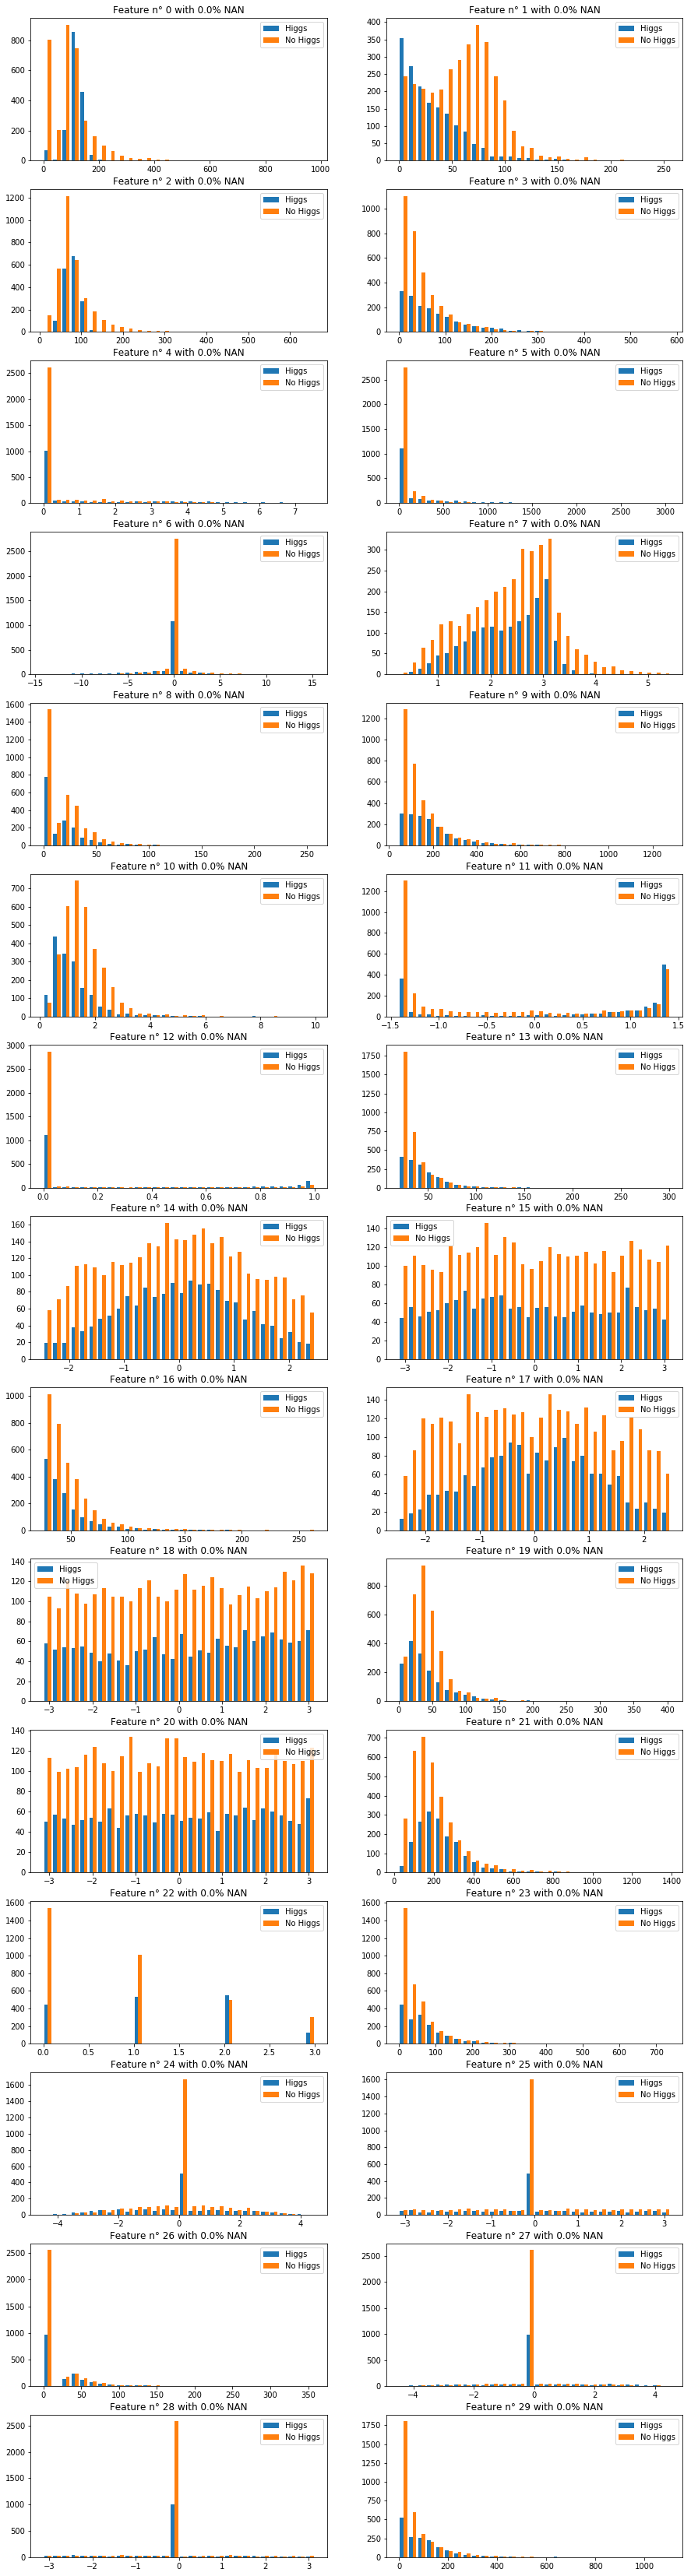

In [74]:
#display features with nan at the mean and no standardization
display_feature_distribution(y, tx_nan_mean, 30)

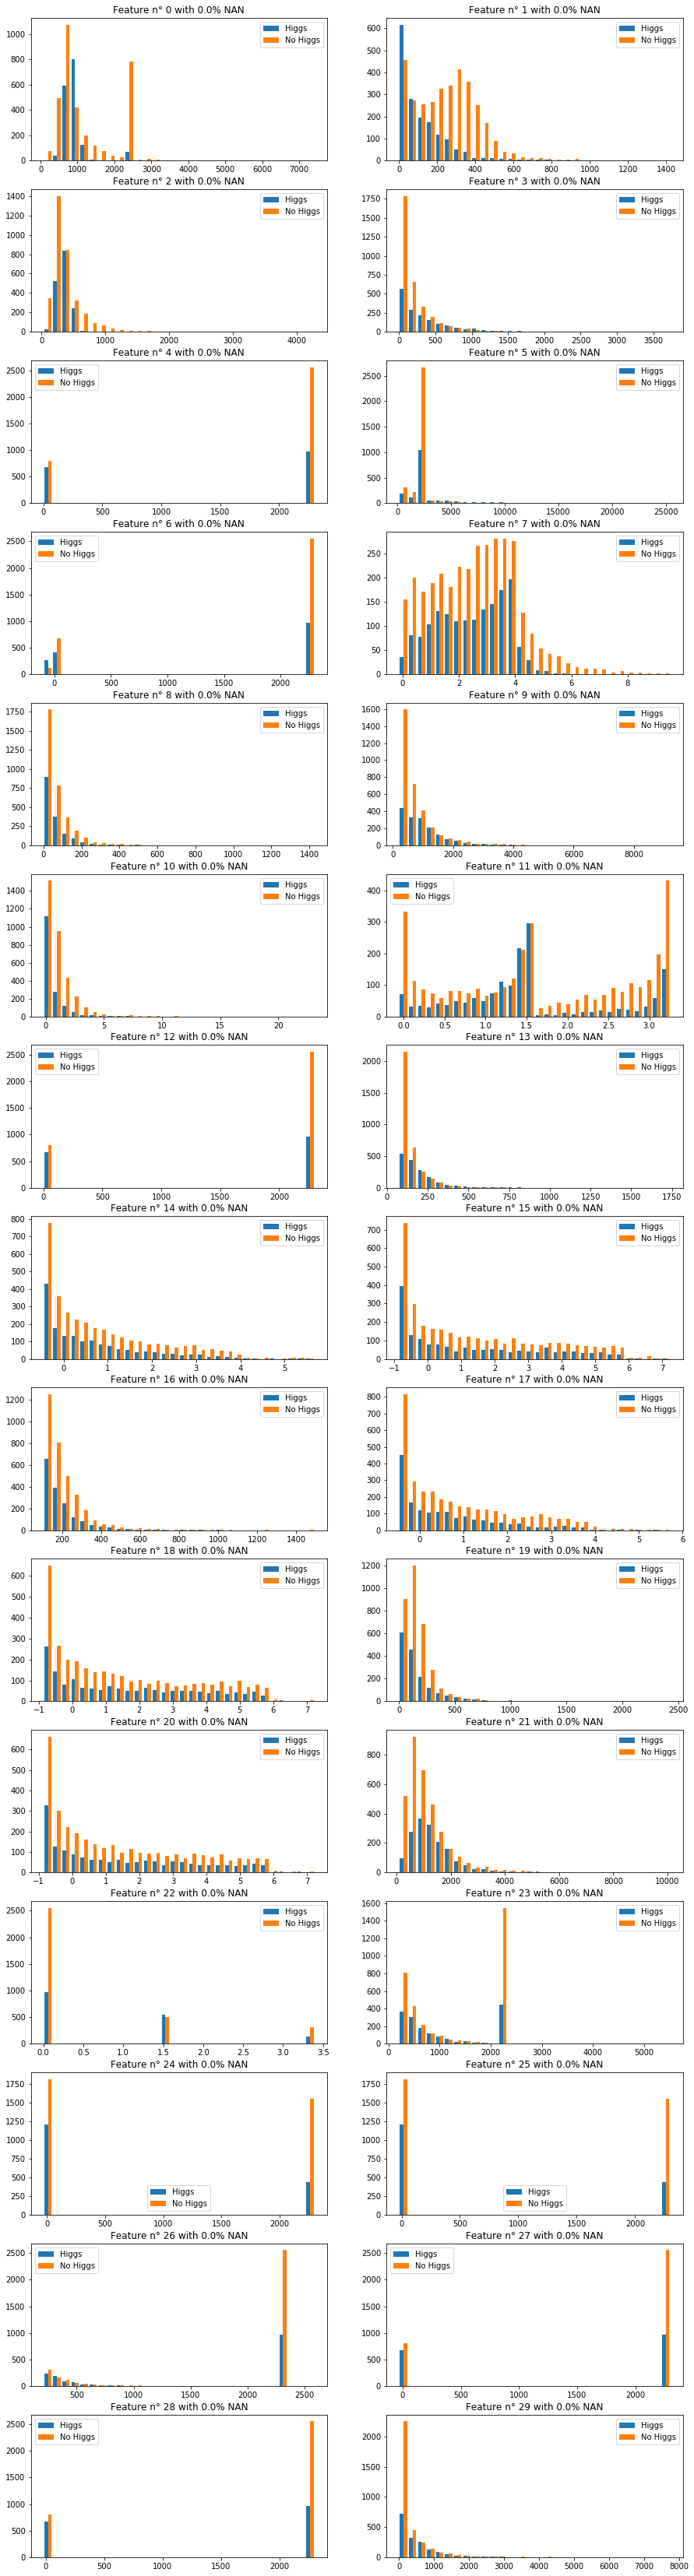

In [81]:
#features*ln(feature) ->seems to improve (selon Arthur)
features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
tx_flnf = transform_feature_log_feature(tx, features)
display_feature_distribution(y, tx_flnf, 30)

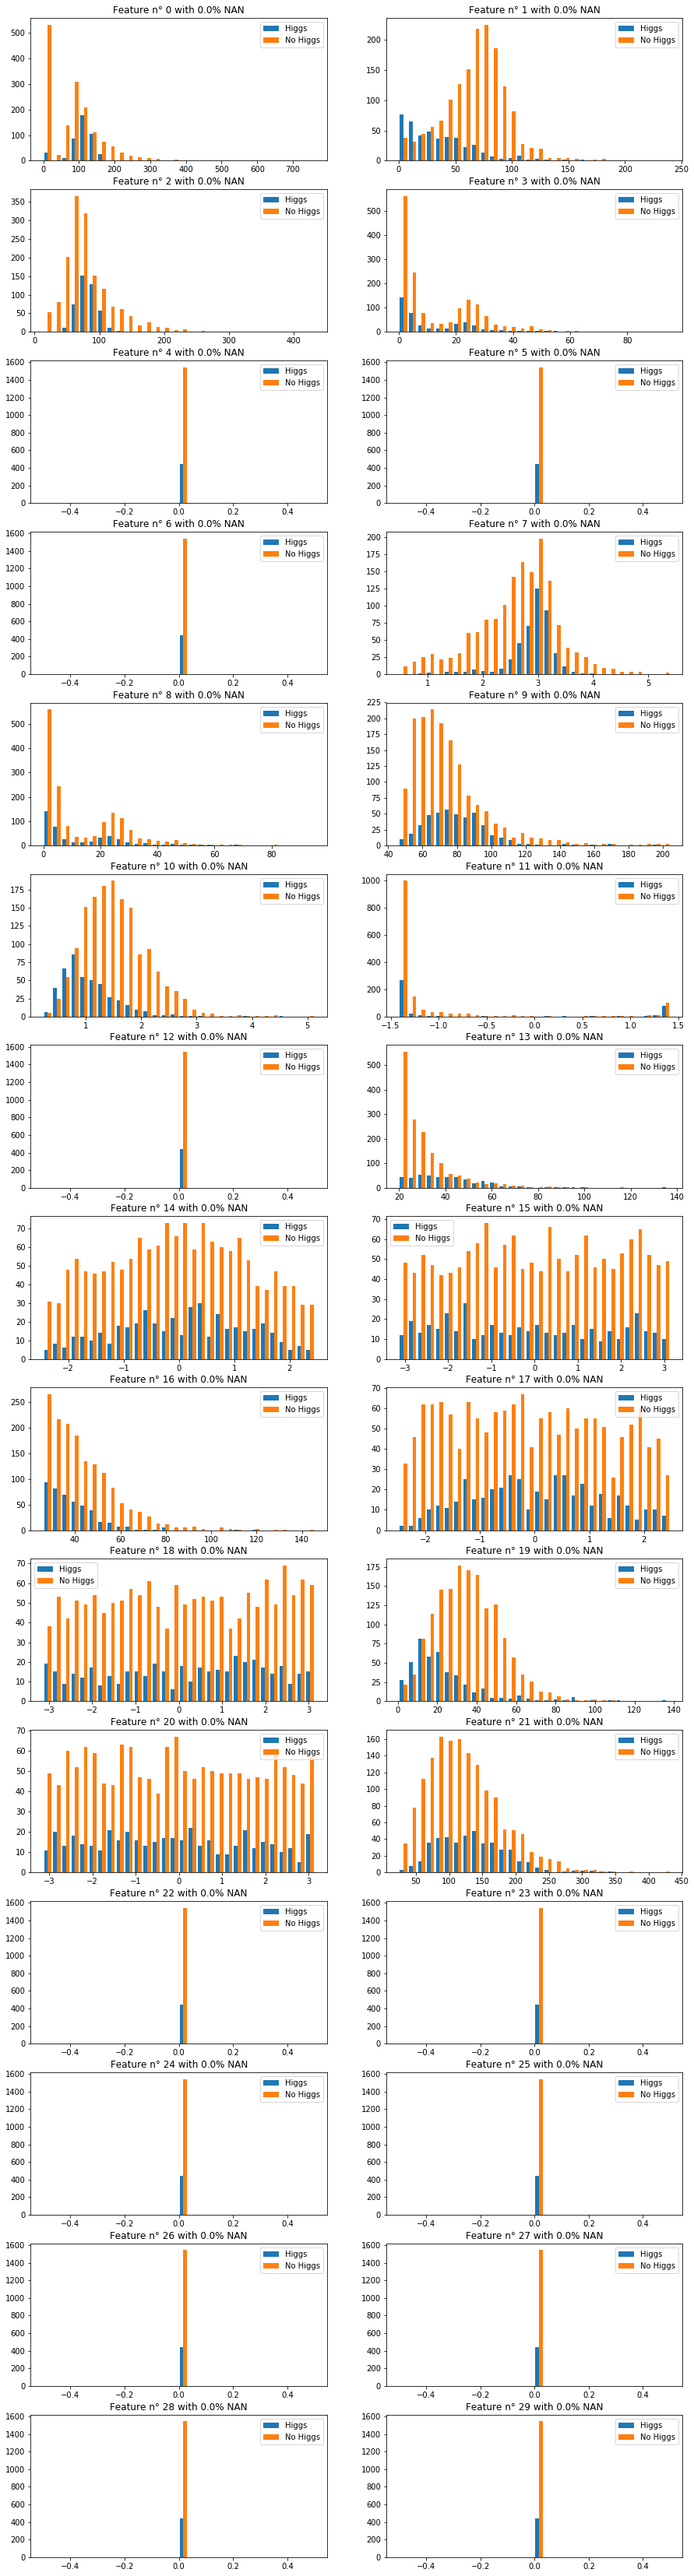

group2


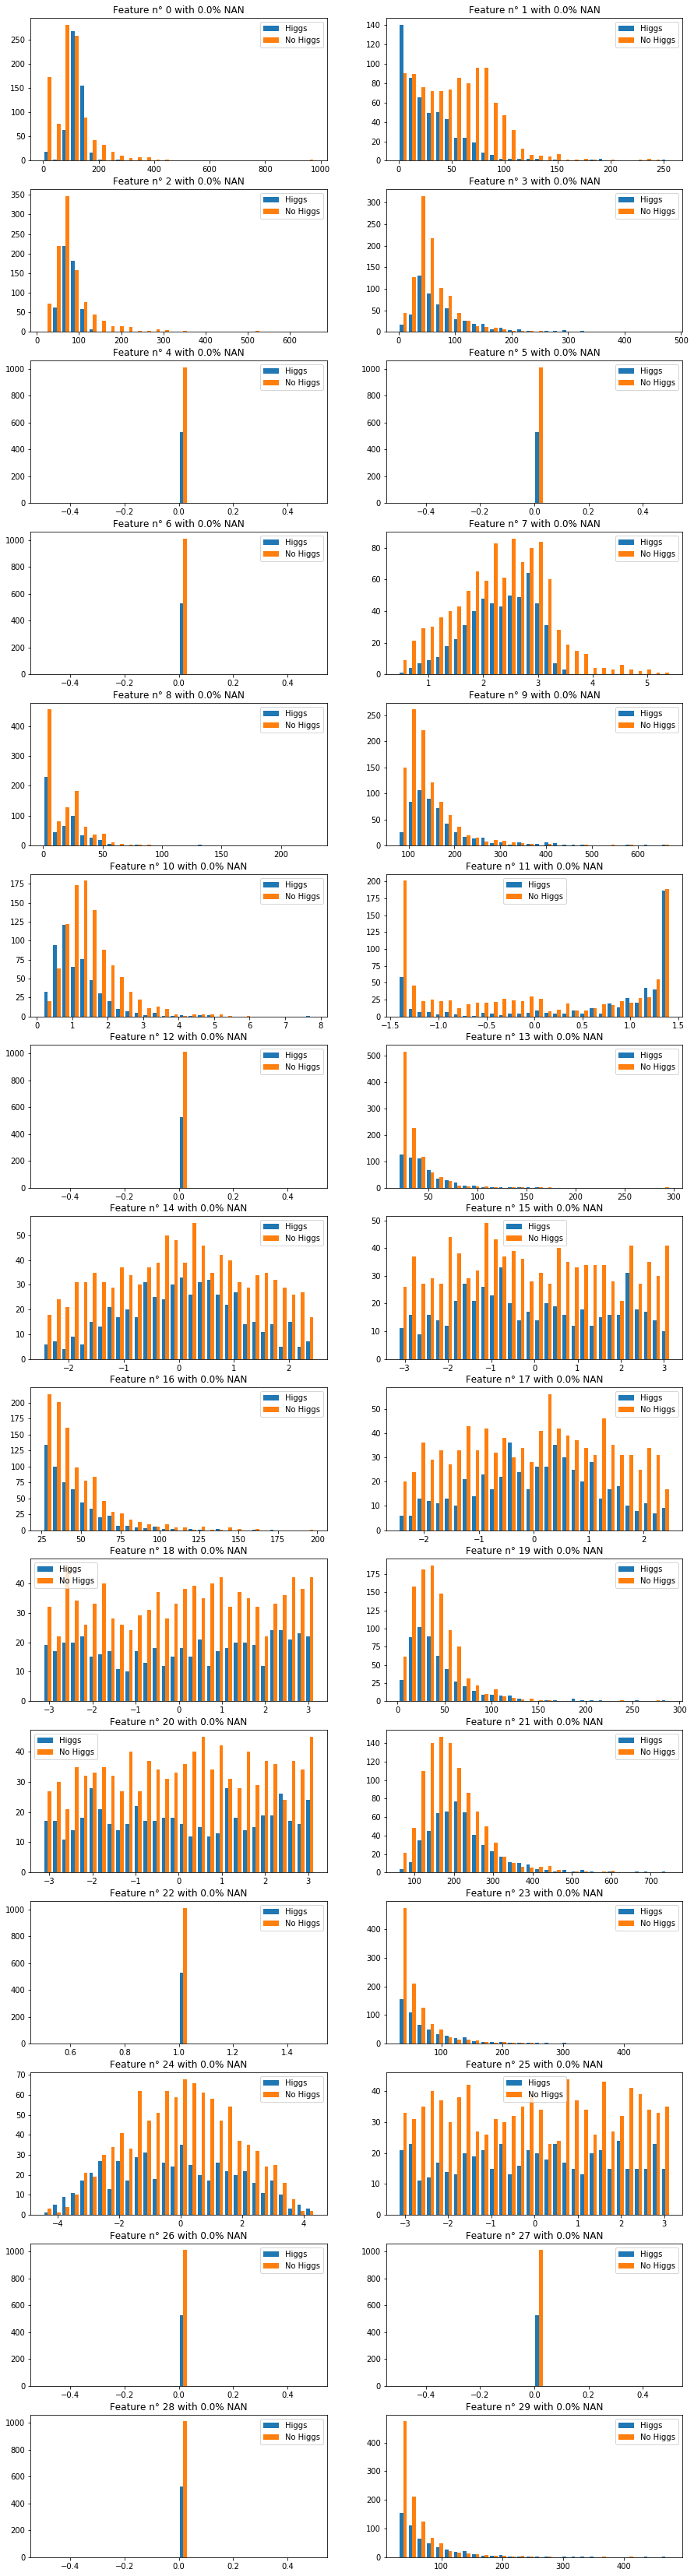

goupe3


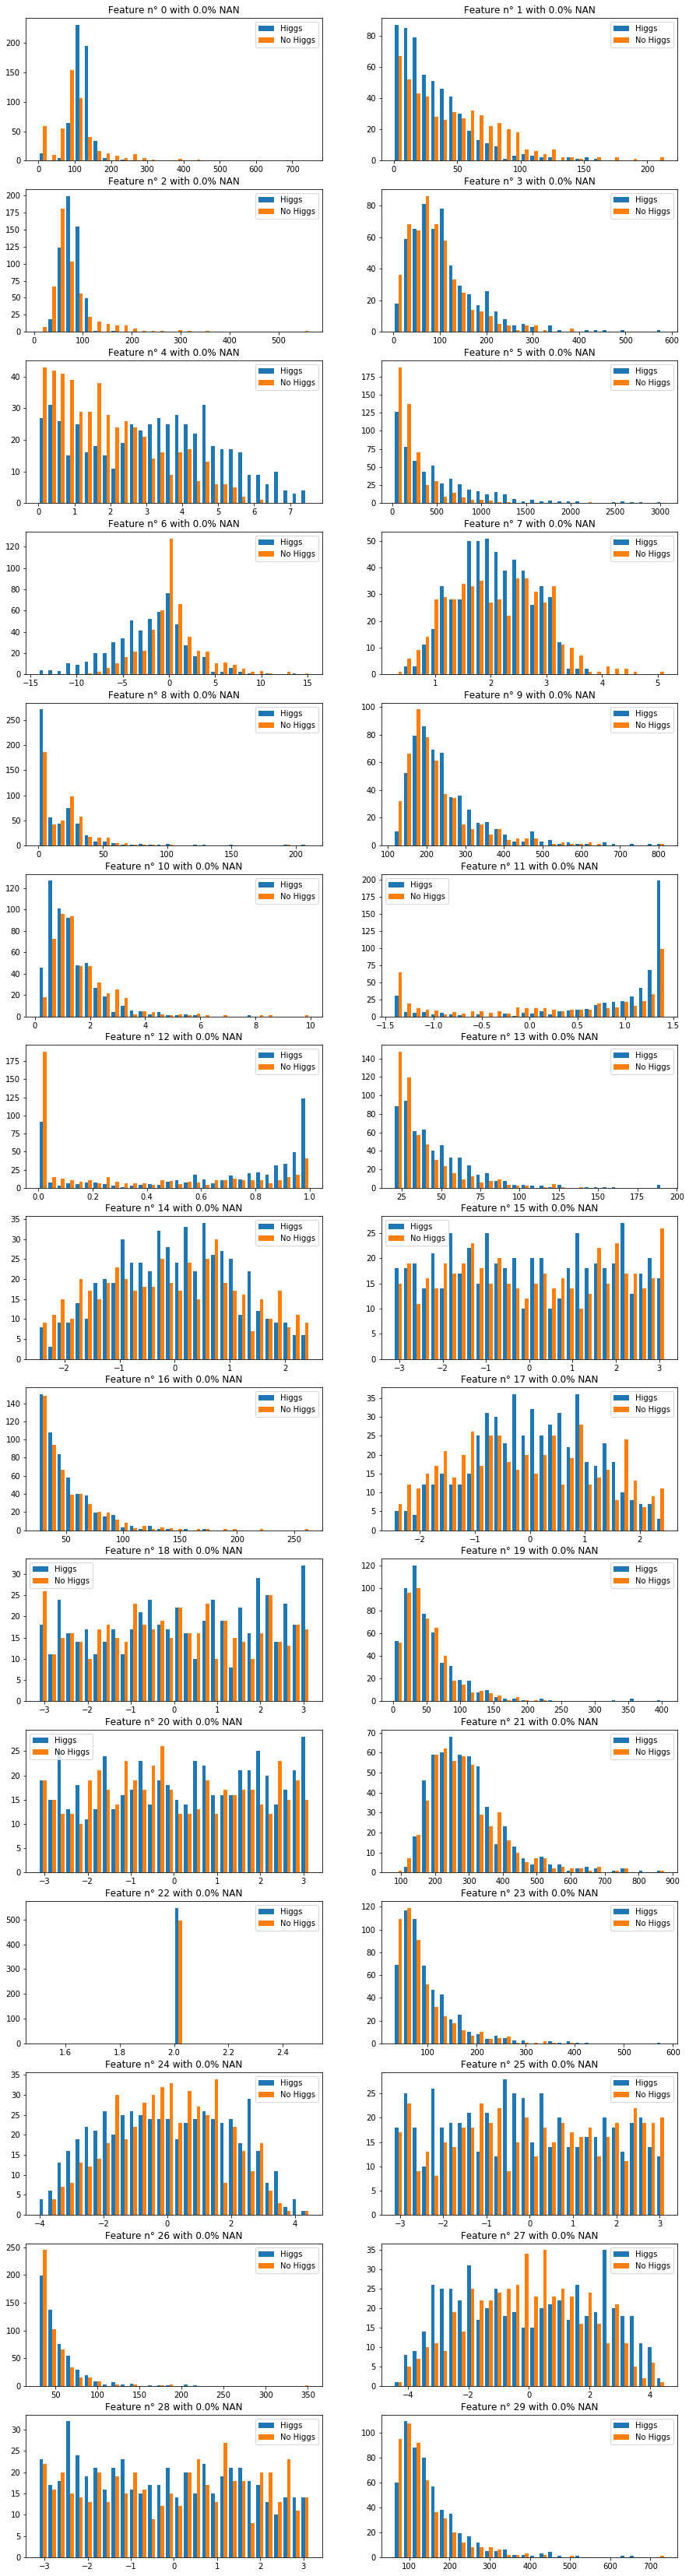

goupe4


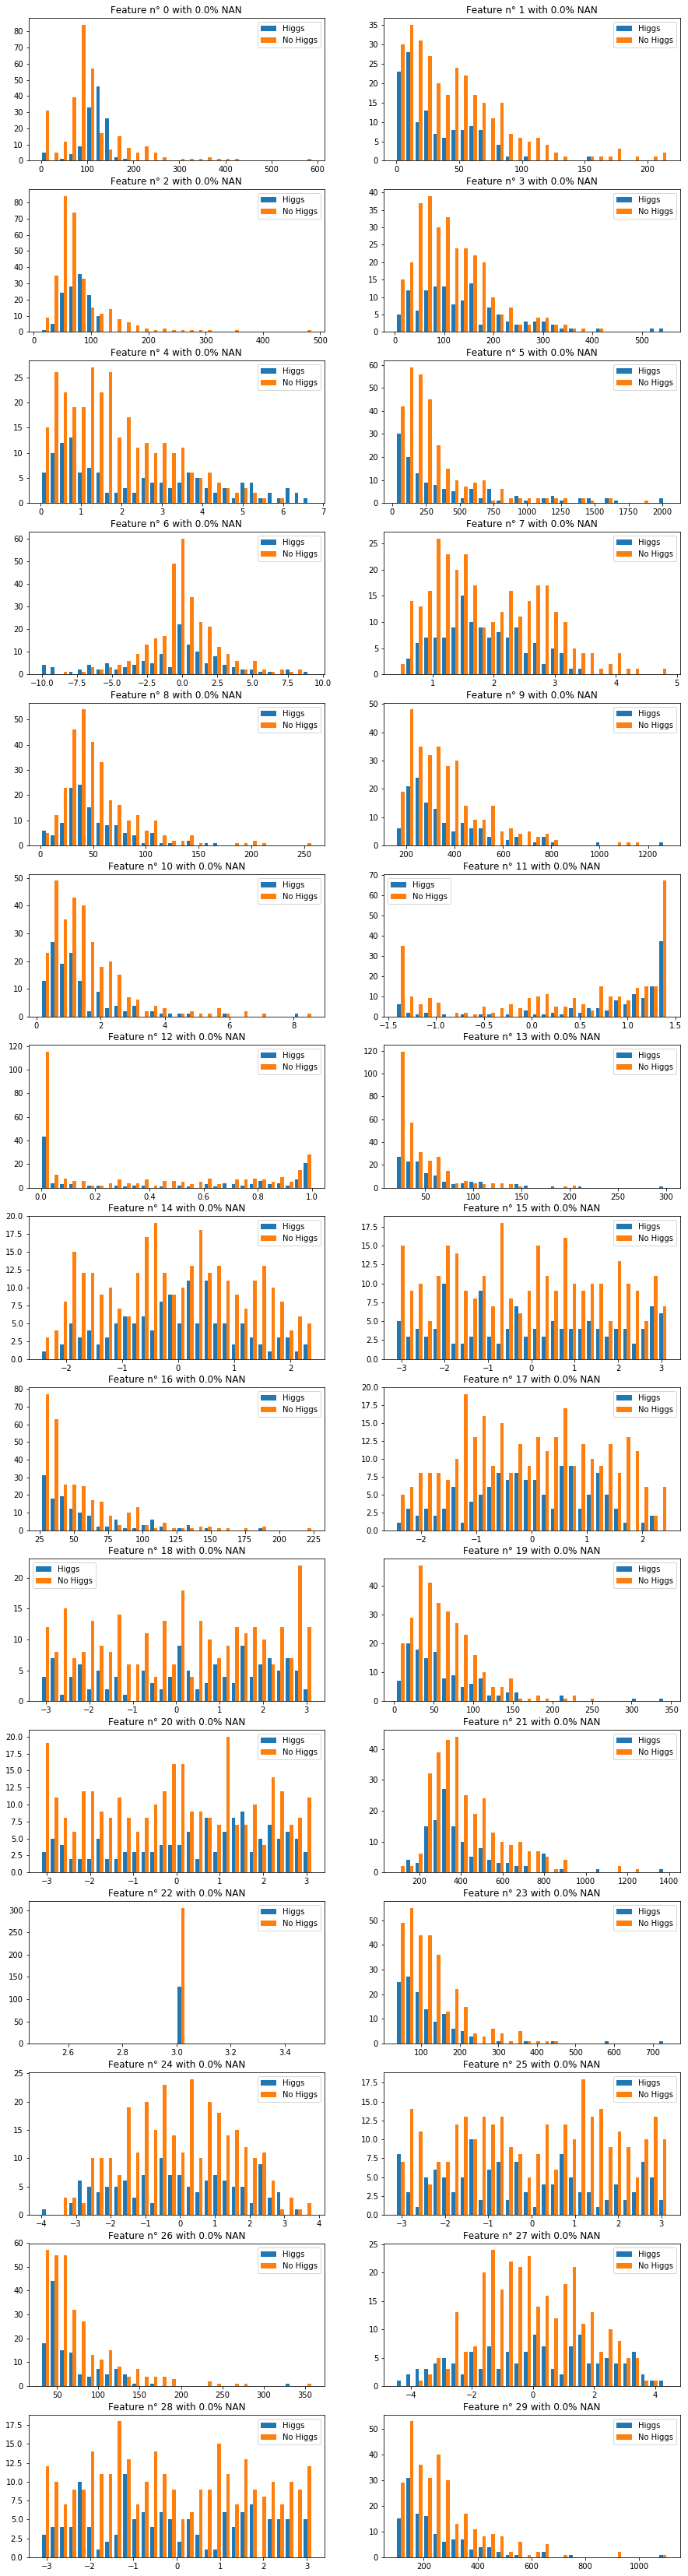

In [76]:
#feature distribution for the different groups tx0, tx1, tx2 and tx3
display_feature_distribution(y0, tx0, 30)
print('group2')
display_feature_distribution(y1, tx1, 30)
print('goupe3')
display_feature_distribution(y2, tx2, 30)
print('goupe4')
display_feature_distribution(y3, tx3, 30)

### Modify Feature Distribution depending on groups

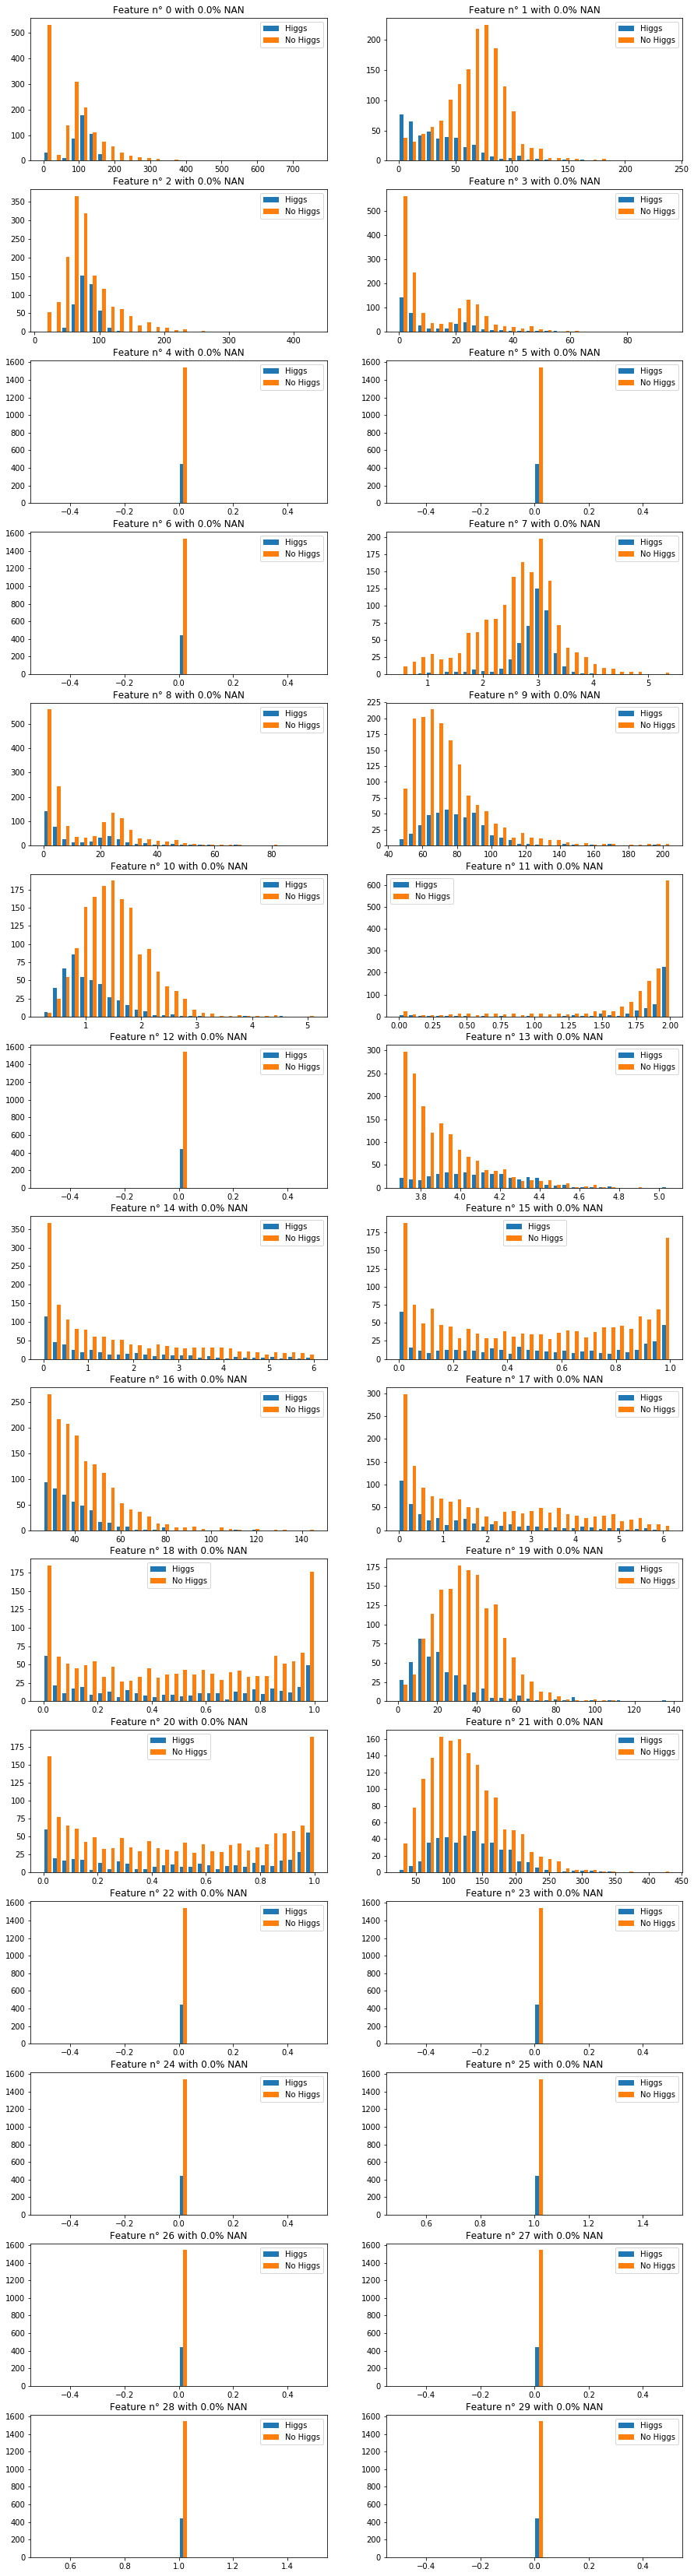

group2


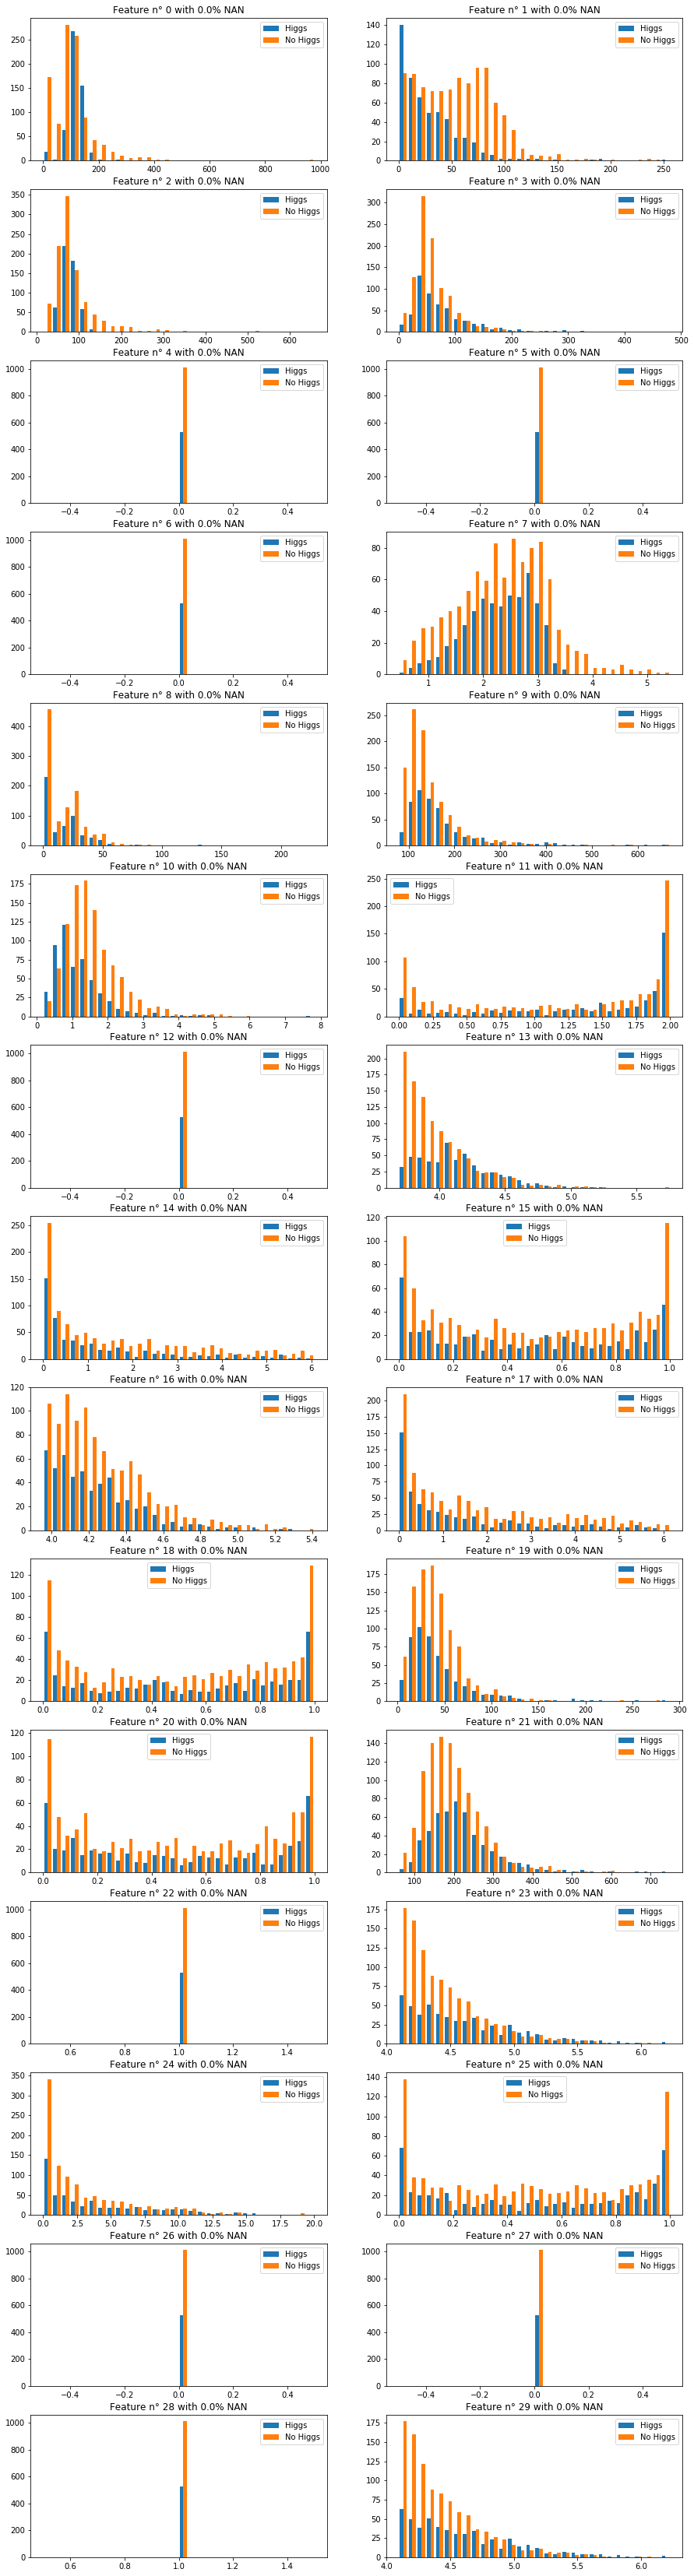

group3


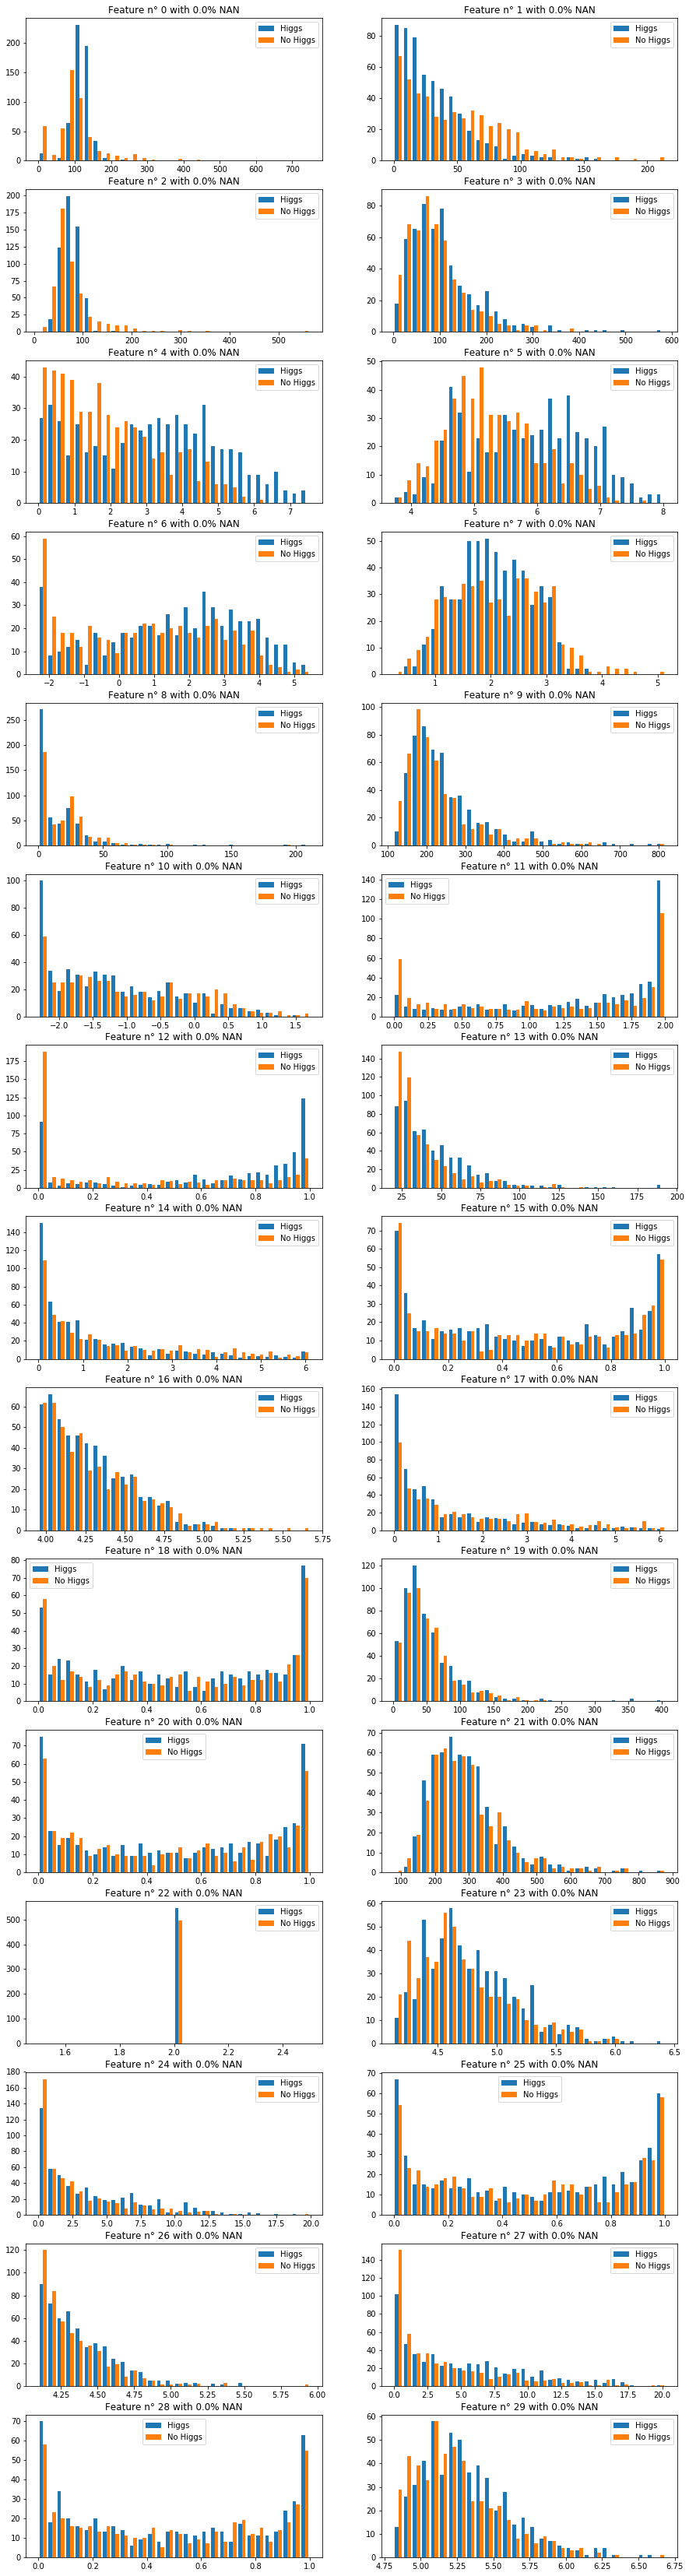

group4


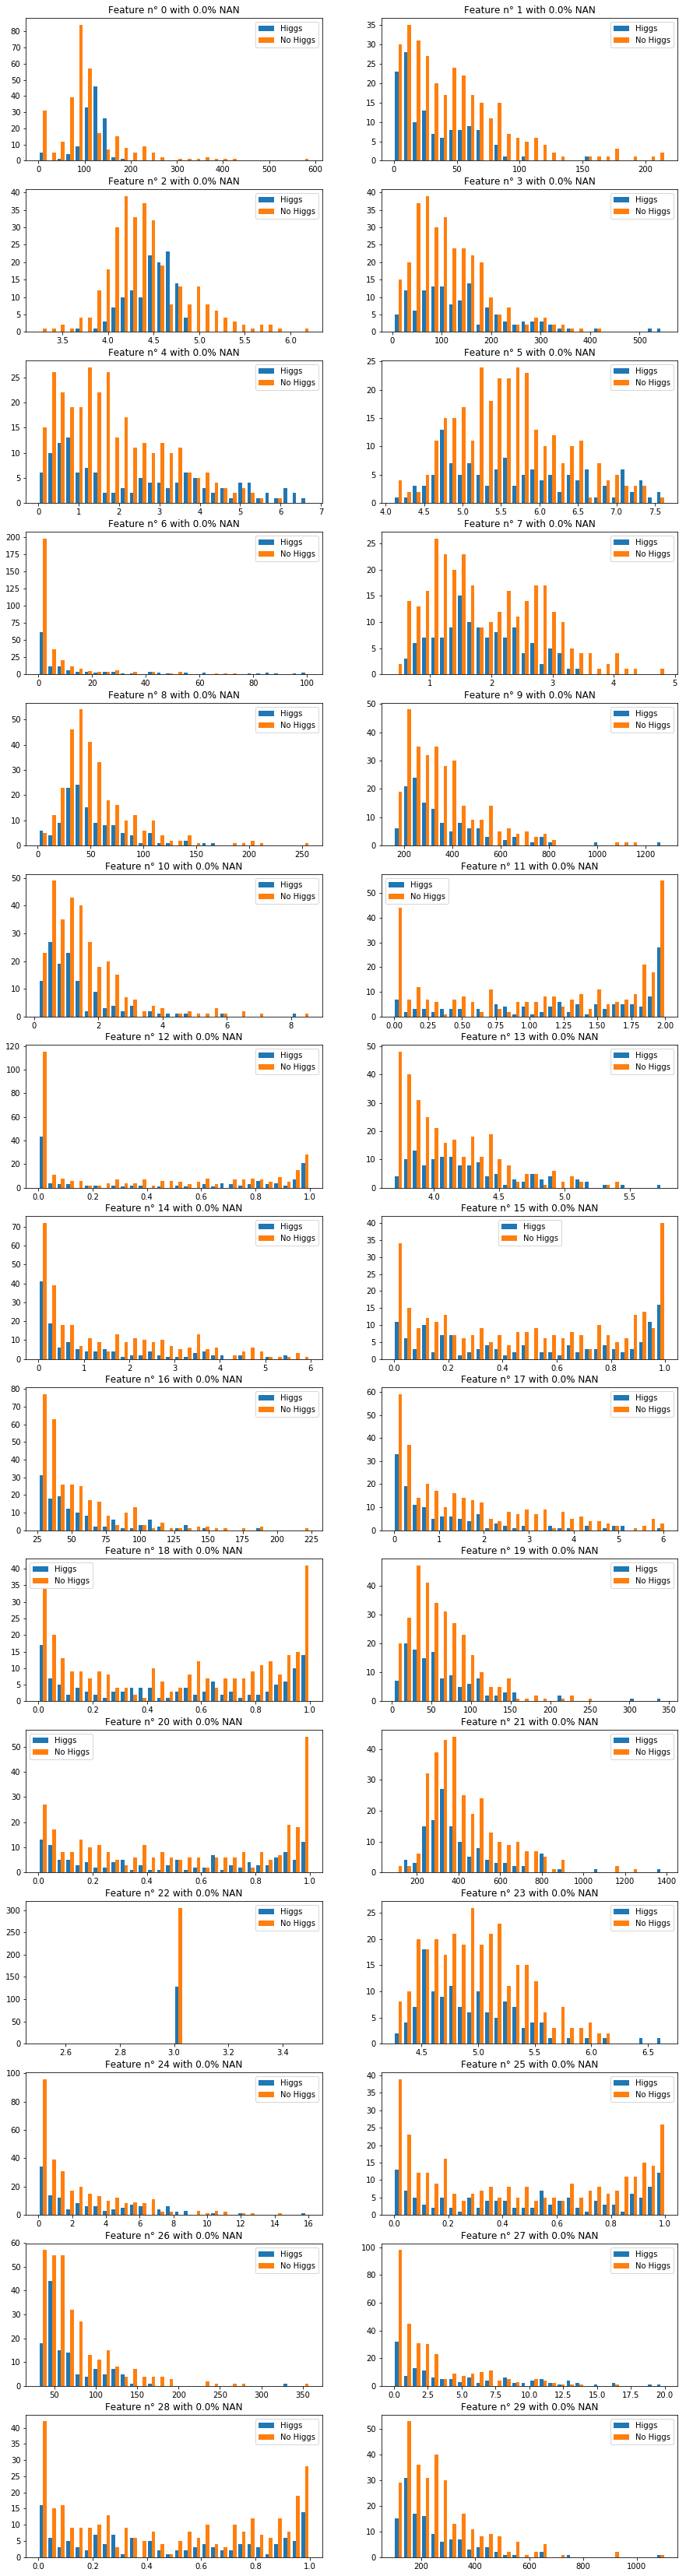

In [14]:
#group0
features_log = [13]
features_sin_cos = [15, 18, 20, 25, 28]
features_power = [11, 14, 15, 17, 18, 20]
tx0_adjusted_log = transform_feature_log(tx0, features_log)
#tx0_adjusted_log_sin = transform_feature_sin(tx0_adjusted_log, features_sin_cos)
tx0_adjusted_log_cos = transform_feature_cos(tx0_adjusted_log, features_sin_cos)
tx0_adjusted_log_cos_x2 = transform_feature_power(tx0_adjusted_log_cos, features_power, 2)

txx = tx0_adjusted_log_cos_x2
(l,c)=np.shape(txx)
display_feature_distribution(y0, txx, c)


#group1
print('group2')
features_log = [13, 16, 23, 29]
features_power = [11, 14, 15, 17, 18, 20, 24, 25]
tx1_adjusted_log = transform_feature_log(tx1, features_log)
#tx1_adjusted_log_sin = transform_feature_sin(tx1_adjusted_log, features_sin_cos)
tx1_adjusted_log_cos = transform_feature_cos(tx1_adjusted_log, features_sin_cos)
tx1_adjusted_log_cos_x2 = transform_feature_power(tx1_adjusted_log_cos, features_power, 2)

txx = tx1_adjusted_log_cos_x2
(l,c)=np.shape(txx)
display_feature_distribution(y1, txx, c)


#group2
print('group3')
features_log = [5, 10, 16, 23, 26, 29]
features_power = [6, 10, 11, 14, 15, 17, 18, 20, 24, 25, 27, 28]
features_log2 = [6, 10]
tx2_adjusted_log = transform_feature_log(tx2, features_log)
#tx2_adjusted_log_sin = transform_feature_sin(tx2_adjusted_log, features_sin_cos)
tx2_adjusted_log_cos = transform_feature_cos(tx2_adjusted_log, features_sin_cos)
tx2_adjusted_log_cos_x2 = transform_feature_power(tx2_adjusted_log_cos, features_power, 2)
tx2_adjusted_log_cos_x2_log = transform_feature_log(tx2_adjusted_log_cos_x2, features_log2)

txx = tx2_adjusted_log_cos_x2_log
(l,c)=np.shape(txx)
display_feature_distribution(y2, txx, c)

#group3
print('group4')
features_log = [2, 5, 13, 23]
features_power = [6, 11, 14, 15, 17, 18, 20, 24, 25, 27, 28]
features_log2 = [6]
tx3_adjusted_log = transform_feature_log(tx3, features_log)
#tx3_adjusted_log_sin = transform_feature_sin(tx3_adjusted_log, features_sin_cos)
tx3_adjusted_log_cos = transform_feature_cos(tx3_adjusted_log, features_sin_cos)
tx3_adjusted_log_cos_x2 = transform_feature_power(tx3_adjusted_log_cos, features_power, 2)
tx3_adjusted_log_cos_x2_log = transform_feature_log(tx3_adjusted_log_cos_x2, features_log2)

txx = tx3_adjusted_log_cos_x2
(l,c)=np.shape(txx)
display_feature_distribution(y3, txx, c)

### Modify Feature Distribution 

In [8]:
tx_0_norm = transform_nan_to_zero(tx_nan_norm)
features_log = [0, 2, 3, 5, 9, 13, 16, 23, 29]
features_sin_cos = [15, 18, 20, 25, 28]

tx_0_norm_adujsted_log = transform_feature_log(tx_0_norm, features_log)
tx_0_norm_adujsted_log_sin = transform_feature_sin(tx_0_norm_adujsted_log, features_sin_cos)
tx_0_norm_adujsted_log_sin_cos = transform_feature_cos(tx_0_norm_adujsted_log_sin, features_sin_cos)

txx = tx_0_norm_adujsted_log_sin_cos
display_feature_distribution(y, txx, 40)

NameError: name 'tx_nan_norm' is not defined





### Train model 

#### Least Square Gradient Descent



In [14]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à n dim à 0
initial_w_gd = np.zeros(c)
max_iters = 10
gamma = 0.25
gd_losses, gd_ws = gradient_descent(y, txx, initial_w_gd, max_iters, gamma)

Gradient Descent(0/9): loss=1.0, w0=-0.04179268796602373, w1=-0.08378602898962993
Gradient Descent(1/9): loss=0.7286610848698903, w0=-0.00851760512171433, w1=-0.10301242010355612
Gradient Descent(2/9): loss=0.8538455827324142, w0=-0.028295156652876803, w1=-0.14532113803750227
Gradient Descent(3/9): loss=0.6904120129030497, w0=-0.00019200899504020347, w1=-0.14819711969386754
Gradient Descent(4/9): loss=0.7937188599435065, w0=-0.014972947332762408, w1=-0.17419904793246635
Gradient Descent(5/9): loss=0.6761922368436195, w0=0.006080271405765551, w1=-0.1732394959004403
Gradient Descent(6/9): loss=0.7594890624454703, w0=-0.005532393835648502, w1=-0.19148964751473815
Gradient Descent(7/9): loss=0.6706033460536049, w0=0.010201534999000044, w1=-0.19008886708795517
Gradient Descent(8/9): loss=0.7369030586201895, w0=0.0011910194160044893, w1=-0.20375665812589963
Gradient Descent(9/9): loss=0.669247596396281, w0=0.013071590905480594, w1=-0.20271998486757212


#### Least Square Stochastic Gradient Descent

In [12]:

def split_data(x, y, ratio, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [15]:
txx.shape

(432, 30)

In [11]:
x_tr,x_te,y_tr,y_te=split_data(txx,y,0.8)

IndexError: index 2764 is out of bounds for axis 0 with size 432

In [16]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à 30 dim à 0
initial_w_sgd = np.zeros(c)
max_iters_sgd = 1000
gamma_sgd = 0.04
sgd_losses, sgd_ws = stochastic_gradient_descent(y, txx, initial_w_sgd,10,  max_iters_sgd, gamma_sgd)

SGD(0/9): loss=0.48055826813084623, w0=-0.00680877789553345, w1=-0.004201861025236286
SGD(1/9): loss=0.45959456903842183, w0=0.0017911416241112987, w1=-0.022562546574616055
SGD(2/9): loss=0.4283781872579659, w0=-0.006547882858376729, w1=-0.03409227342723294
SGD(3/9): loss=0.422475743870666, w0=-0.005680899829190946, w1=-0.031128613348286843
SGD(4/9): loss=0.4096033761267466, w0=-0.009576471460149515, w1=-0.028073057156648568
SGD(5/9): loss=0.44476167219863455, w0=-0.02506728429058247, w1=-0.010250668664291158
SGD(6/9): loss=0.4272863111659575, w0=-0.029442433051849296, w1=-0.01221918939855268
SGD(7/9): loss=0.41030817043404766, w0=-0.023911048078445216, w1=-0.028071137521495662
SGD(8/9): loss=0.3937314629932141, w0=-0.021199286360004302, w1=-0.0449175956383792
SGD(9/9): loss=0.3800875589911253, w0=-0.026512112038881687, w1=-0.049083733633664695


In [ ]:

l,wnew=minimum_loss_vector(sgd_losses, sgd_ws)
l,wnew

In [ ]:
y_pred=predict_labels(wnew, x_tr)

In [ ]:
accuracy_calculator(y_pred, y_tr)

#### Least Square

In [18]:
weight = least_squares(y, txx)
losses = compute_loss(y, txx, weight)
print("weights : {0}".format(weight))
print("losses : {0}".format(losses))

weights : [ 0.11051554 -0.2568357  -0.32113174 -0.07081299  0.49652604 -0.49102522
 -0.04901669  0.1770458   0.01579191  0.03954131  0.10391632  0.12438019
  0.13730787  0.36100783  0.00545586 -0.01328455  0.03348455  0.02539963
 -0.07338907  0.06837654 -0.03006469 -0.0847102  -0.21784139  0.04543065
 -0.03770506  0.0166237   0.06115731  0.00725961 -0.06214666  0.19787683
  0.01367538  0.11984668  0.03025817 -0.02170751  0.06292839 -0.00616231
 -0.01642778  0.00290473  0.05202917  0.00379839]
losses : 0.32201628761540085


#### Ridge Regression

In [20]:
#for different lambdas
lambdas = np.logspace(-100, 100, 200);
#ridge reggression for different lambda
losses = []
for index, lambda_ in enumerate(lambdas):
    weight = ridge_regression(y, txx, lambda_)
    losses.append(compute_loss(y, txx, weight))
print(losses)

[0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.3220162876